##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Grocery classification with TensorFlow Lite Model Maker with TensorFlow 2.0

Model Maker library simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify groceries on a mobile device.

## Prerequisites

To run this example, we first need to make a copy of this notebook. Click on "Copy to Drive" at the top of this notebook. Then we need to install serveral required packages, including Model Maker package that in github [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [ ]:
!pip install git+git://github.com/tensorflow/examples.git#egg=tensorflow-examples[model_maker]

  Cloning git://github.com/tensorflow/examples.git to /tmp/pip-install-mxts_c3o/tensorflow-examples
  Running command git clone -q git://github.com/tensorflow/examples.git /tmp/pip-install-mxts_c3o/tensorflow-examples
  Created wheel for tensorflow-examples: filename=tensorflow_examples-6370ef7b82a9940dcdada21292a482d42d1943c0_-cp37-none-any.whl size=236450 sha256=4ccaa70588258dce1d4cc7ceb24dc3ce6039a3f6f07df71ae40b78b826536b93
  Stored in directory: /tmp/pip-ephem-wheel-cache-24i0n35c/wheels/e5/c4/a6/06536184521b8cea0638738f5b5dfced9327f83ba6e0b60c2b
Successfully built tensorflow-examples


In [ ]:
!pip install tflite-model-maker

     |████████████████████████████████| 501kB 6.2MB/s 
     |████████████████████████████████| 122kB 7.4MB/s 
     |████████████████████████████████| 133kB 10.1MB/s 
     |████████████████████████████████| 112kB 13.8MB/s 
     |████████████████████████████████| 645kB 10.8MB/s 
     |████████████████████████████████| 174kB 19.9MB/s 
     |████████████████████████████████| 1.0MB 16.7MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 1.2MB 28.6MB/s 
     |████████████████████████████████| 5.5MB 44.5MB/s 
     |████████████████████████████████| 849kB 51.5MB/s 
     |████████████████████████████████| 706kB 50.6MB/s 
     |████████████████████████████████| 194kB 50.3MB/s 
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 358kB 40.9MB/s 
     |████████████████████████████████| 37.6MB 95kB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-no

Import the required packages.

In [ ]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow_examples.lite.model_maker.core.data_util.image_dataloader import ImageClassifierDataLoader
from tensorflow_examples.lite.model_maker.core.task import image_classifier
from tensorflow_examples.lite.model_maker.core.task.model_spec import mobilenet_v2_spec
from tensorflow_examples.lite.model_maker.core.task.model_spec import ImageModelSpec

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Simple End-to-End Example

### Run the example


1.   Load input data specific to an on-device ML app. Split it to training data and testing data.

In [ ]:
image_path = "/content/drive/MyDrive/Colab Notebooks/dataset" #replace it with your own path in Google drive
data = ImageClassifierDataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3938, num_label: 35, labels: Apple, Asparagus, Aubergine, Avocado, Banana, Brown-Cap-Mushroom, Cabbage, Carrots, Cucumber, Garlic, Ginger, Kiwi, Leek, Lemon, Lime, Mango, Melon, Milk, Nectarine, Onion, Orange, Papaya, Passion-Fruit, Peach, Pear, Pepper, Pineapple, Plum, Pomegranate, Potato, Red-Beet, Red-Grapefruit, Satsumas, Tomato, Zucchini.


2. Customize the TensorFlow model.

In [ ]:
from tflite_model_maker import model_spec


In [ ]:
model = image_classifier.create(train_data, shuffle=True, epochs=10)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 35)                44835     
Total params: 3,457,859
Trainable params: 44,835
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10
110/110 [==============================] - 755s 7s/step - loss: 2.7428 - accuracy: 0.3562
Epoch 2/10
110/110 [==============================] - 273s 2s/step - loss: 1.3314 - accuracy: 0.8062
Epoch 3/10
110/110 [==============================] - 271s 2s/step - loss: 1.1614 - accuracy: 0.8758
Epoch 4/10
110/110 [==

3. Evaluate the model.

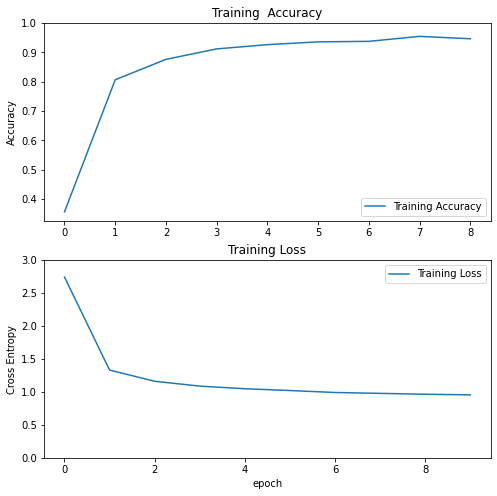

In [4]:
import matplotlib.pyplot as plt
history = {'accuracy': [0.3562,0.8062,0.8758,0.9115,0.9259,0.9355,0.9372,0.9542,0.9460], 'loss': [2.7428, 1.3314, 1.1614, 1.0879,1.0483,1.0210,0.9911,0.9779,0.9646,0.9553]}
acc = history['accuracy']
loss = history['loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training  Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_data)

13/13 [==============================] - 101s 6s/step - loss: 0.9614 - accuracy: 0.9365


4.  Export to TensorFlow Lite model.
You could download it in the left sidebar same as the uploading part for your own use.

In [ ]:
model.export(export_dir='.', with_metadata=True)

INFO:tensorflow:Assets written to: /tmp/tmplqyrpsuh/assets


INFO:tensorflow:Assets written to: /tmp/tmplqyrpsuh/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmp1gf3u7uw/labels.txt.


INFO:tensorflow:Saving labels in /tmp/tmp1gf3u7uw/labels.txt.


5. Download the trained model by clicking on the folder icon on the left hand side. Right-click on "model.tflite" and select download. Or run the following code:

In [ ]:
from google.colab import files
files.download('model.tflite') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>